# 1. Importar las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 2. Unir todos los archivos con los datos de las ventas en uno solo

#### Es más sencillo realizar un análisis anual con todos los datos en un mismo archivo que mes a mes

In [2]:
#Leemos el primer archivo csv para mostrar como se hace
df = pd.read_csv('/kaggle/input/sales-2019-exsercise/Sales_April_2019.csv')
df

#Debemos ahora encontrar un método para leer todos los archivos de ventas y unirlos en uno solo

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [3]:
#Creamos un DataFrame vacío donde almacenaremos los datos de todos los meses
all_months_data = pd.DataFrame()

#Creamos una list con todos los arvhivos del directorio
files = [file for file in os.listdir('/kaggle/input/sales-2019-exsercise')] 

#Recorremos la lista con todos los archivos de lo meses y los añadimos a un solo DataFrame
for file in files:
    df = pd.read_csv('/kaggle/input/sales-2019-exsercise/' + file) 
    #Se convierte en DataFrame cada mes mediante la concatenación de cadenas para generar la url
    all_months_data =  pd.concat([all_months_data, df]) #Se une cada mes leido en el DataFrame final

#Mostramos las primeras filas del DataFrame donde hemos unido las ventas de todos los meses
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
#Convertir el DataFrame con todos los meses a un csv para verificar que esto se realizó correctamente
all_months_data.to_csv('all_data.csv', index=False)
#index=False es para no guardar en el archivo csv la primera columna (índice)

In [5]:
#Leer el DataFrame con todos los meses de ventas
all_data = pd.read_csv('/kaggle/working/all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# 3. Limpiar los datos
#### Vamos a liminar los valores nulos

In [6]:
#Con .dropna() eliminamos las filas del DataFrame que tengan al menos un valor NaN
#Si queremos eliminar solo las que tengan todos los valores NaN debemos usar el argumento how='all'
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [7]:
#Encontrar las filas con valores incorrectos
all_data_or = all_data[all_data['Order Date'].str[0:2] == 'Or']
all_data_or.head()

#Eliminar del DataFrame de trabajo estas filas con valores incorrectos
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [8]:
#Convertir las columnas 'Quantity Ordered' y 'Price Each' a tipo numérico para poder realizar cálculos con ellas
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Pregunta 1: Mes más rentable y cuanto se vendió ese mes

In [9]:
#Debemos obtener el mes de la columna 'Order Date'
all_data['Month'] = all_data['Order Date'].str[0:2]

#Convertir la nueva columna 'Month' a entero ya que es un número
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


In [10]:
#Comprobación de que la columna 'Month' ahora es de tipo entero
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [11]:
#Calcular la columna 'Sales' como la multiplicación de 'Quantity Ordered' por 'Price Each'
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [12]:
#Calculamos las ventas mensuales
total_month_sales = all_data.groupby('Month').sum(numeric_only=True)
total_month_sales
#numeric_only=True asegura que solo se sumen columnas numéricas, si no se pone salta una advertencia ya que esta funcionalidad suma va a cambiar en futuras versiones de pandas

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


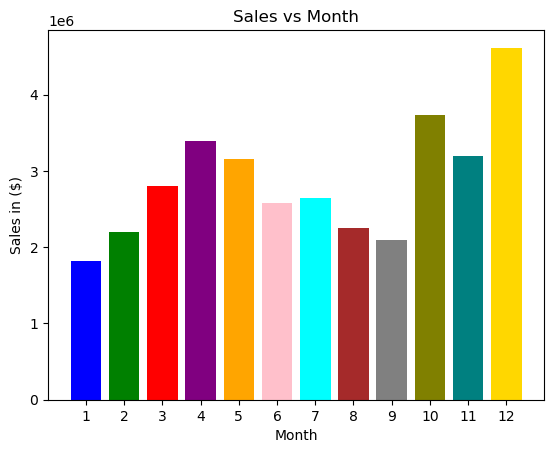

<Figure size 1500x1000 with 0 Axes>

In [13]:
#Vamos a representa los resultados en un diagrama de barras
#Necesitamos los meses y las ventas totales por mes(esto lo hemos calculado antes)

months = range(1,13) #Así obtenemos los meses del 1 al 12

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'brown', 'gray', 'olive', 'teal', 'gold']

plt.bar(months, total_month_sales['Sales'], color=colors)
plt.xticks(months)
plt.ylabel('Sales in ($)')
plt.xlabel('Month')
plt.title('Sales vs Month')
plt.figure(figsize=(15,10))
plt.show()

# Respuesta: El mes de Diciembre tuvo el mayor número de ventas con un total de 4.613.443,34 $

# Pregunta 2: Ciudad con mayor número de ventas

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [15]:
#Separar la columna 'Purchase Address' en 'Address', 'City', 'State' y 'ZIP'

#Usamos el método .split() para separar por el delimitador coma
all_data[['Street', 'City', 'State']] = all_data['Purchase Address'].str.split(', ', expand=True)

#Separamos el código postal de las siglas del estado, ya que no se puede hacer con split por no estar separados por una coma y lo almacenamos en una nueva columna
all_data['ZIP'] = all_data['State'].str[3:]
#Convertimos el código postal a tipo entero ya que es un número
all_data['ZIP'] = all_data['ZIP'].astype('int')

#Modificamos la columna 'State' para que solo contenga las siglas del estado
all_data['State'] = all_data['State'].str[0:2]

#Como puede haber ciudades que se llamen igual, vamos a unir el nombre de la ciudad al del estado
all_data['City_State'] = all_data['City'] + ' ' + all_data['State']

#Eliminar la comlumna 'Purchase Address', 'City' y 'State' ya que ya no se necesita
all_data.drop(columns=['Purchase Address', 'City', 'State'], inplace=True) #inplace=True hace que no tengamos que machacar el valor de all_data para que se elimine la columna

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,Street,ZIP,City_State
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,8,23.98,359 Spruce St,98101,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,8,99.99,492 Ridge St,75001,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,8,700.00,149 7th St,97035,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,8,7.68,631 2nd St,90001,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,8,7.68,736 14th St,10001,New York City NY


In [16]:
total_sales_city = all_data.groupby('City_State').sum(numeric_only=True)
total_sales_city

,Quantity Ordered,Price Each,Month,Sales,ZIP
City_State,,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58,450909181
Austin TX,11153,1809873.61,69829,1819581.75,726046405
Boston MA,22528,3637409.77,141112,3661642.01,44153810
Dallas TX,16730,2752627.82,104620,2767975.40,1111514820
Los Angeles CA,33289,5421435.23,208325,5452570.80,2664479605
New York City NY,27932,4635370.83,175741,4664317.43,248784876
Portland ME,2750,447189.25,17144,449758.27,10067955
Portland OR,11303,1860558.22,70621,1870732.34,971320350
San Francisco CA,50239,8211461.74,315520,8262203.91,4205523712


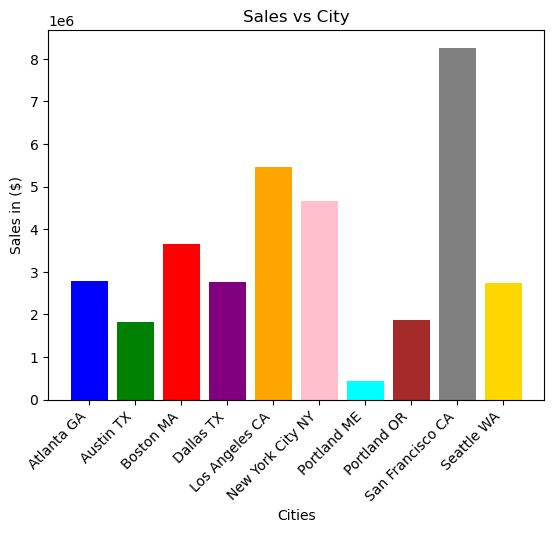

<Figure size 1500x1000 with 0 Axes>

In [17]:
#Vamos a representa los resultados en un diagrama de barras
#Necesitamos las ciudades y las ventas totales por ciudad(esto lo hemos calculado antes)

cities = [city for city, df in all_data.groupby('City_State')]

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'brown', 'gray', 'gold']

plt.bar(cities, total_sales_city['Sales'], color=colors)
plt.xticks(cities, rotation=45,ha='right')
plt.ylabel('Sales in ($)')
plt.xlabel('Cities')
plt.title('Sales vs City')
plt.figure(figsize=(15,10))
plt.show()

# Respuesta: San Francisco CA, es la ciudad con mayores ventas con un total de 8.262.203,91 $

# Pregunta 3: ¿Cuál es el mejor momento del día para el lanzamiento de campañas publicitarias? 
#### Hacer más probable que los clientes compren 

In [18]:
#Como vamos a análizar cual es la mejor hora del día para lanzar la publicidad, debemos obtener primero las horas de los pedidos de la columna 'Odrder Date'
#Para ello lo más cómodo es cambiar el tipo de dato de la columna 'Order Date' a tipo fecha y extraer de ahí la hora
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#Ahora creamos una nueva columna 'Hours' con las horas de los pedidos
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,Street,ZIP,City_State,Hours,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,8,23.98,359 Spruce St,98101,Seattle WA,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,8,99.99,492 Ridge St,75001,Dallas TX,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,8,700.00,149 7th St,97035,Portland OR,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,8,7.68,631 2nd St,90001,Los Angeles CA,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,8,7.68,736 14th St,10001,New York City NY,19,53


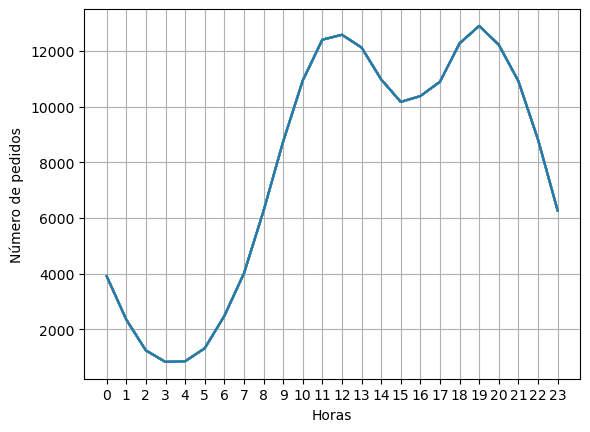

In [19]:
#Vamos a representar el número de pedidos para cada hora frente a las horas del día y ver si hay algúna hora con mpas pedidos que el resto

hours = [hour for hour, df in all_data.groupby('Hours')]

plt.plot(hours, all_data.groupby(['Hours']).count())
plt.xticks(hours)
plt.xlabel('Horas')
plt.ylabel('Número de pedidos')
plt.grid()
plt.show()

# Respuesta: Parece ser, según el gráfico, que las mejores horas para lanzar las campaña publicitarias son a las 12 am y a las 7 pm ya que es cuando más pedidos se realizaron.

# Pregunta 4: ¿Qué productos se suelen vender juntos más habitualmente?

In [20]:
#Obtenemos todas las filas del DataFrame con 'Order ID' repetido (son pedidos con al menos 2 productos)
order_several_items = all_data[all_data['Order ID'].duplicated(keep=False)]

In [21]:
#Agrupamos las filas de los pedidos con más de un producto y las ponemos en una sola fila poniendo todos los productos juntos en una lista
grouped_orders = order_several_items.groupby('Order ID')['Product'].apply(list).reset_index() #.reset_index() se usa para convertir el resultado en un nuevo DataFrame
grouped_orders.head()

,Order ID,Product
0,141275,"[USB-C Charging Cable, Wired Headphones]"
1,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
2,141365,"[Vareebadd Phone, Wired Headphones]"
3,141384,"[Google Phone, USB-C Charging Cable]"
4,141450,"[Google Phone, Bose SoundSport Headphones]"


In [22]:
#Importamos el módulo Counter de la librería collections para contar las combinaciones de productos en lso pedidos
from collections import Counter

product_combinations = Counter()

for products in grouped_orders['Product']:
    product_combinations.update([tuple(sorted(products))])

# Obtén las combinaciones más comunes
most_common_combinations = product_combinations.most_common(10)  #El número entre parétesis es el número de combianciones que deseamos 
most_common_combinations

#Mostramos los resultados de forma más ordenada
for key, value in most_common_combinations:
    print(key, value)

('Lightning Charging Cable', 'iPhone') 891
('Google Phone', 'USB-C Charging Cable') 868
('Wired Headphones', 'iPhone') 374
('USB-C Charging Cable', 'Vareebadd Phone') 318
('Google Phone', 'Wired Headphones') 311
('Apple Airpods Headphones', 'iPhone') 299
('Bose SoundSport Headphones', 'Google Phone') 169
('Vareebadd Phone', 'Wired Headphones') 110
('AA Batteries (4-pack)', 'Lightning Charging Cable') 103
('Lightning Charging Cable', 'USB-C Charging Cable') 96


# Respuesta: Los artículso más habitualmente vendidos juntos son iPhone y Lightning Charging Cable con 891 ventas de esta combinación

# Pregunta 5: Producto más vendido

In [23]:
#Para saber que productos se vendió mas basta con sumar la cantidad total de productos agrupados por el tipo de producto
most_sold_product = all_data.groupby(['Product']).sum('Quantity Ordered')
#Ordenamos los resultados por la cantidad vendida de forma descendiente
most_sold_product_sorted = most_sold_product.sort_values(by='Quantity Ordered', ascending=False)
most_sold_product_sorted

,Quantity Ordered,Price Each,Month,Sales,ZIP,Hours,Minute
Product,,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,1315994983,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,1316853228,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,1394637283,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,1385887576,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,1212505072,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,992497086,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,854223428,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,476025430,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,439749350,98657,201688


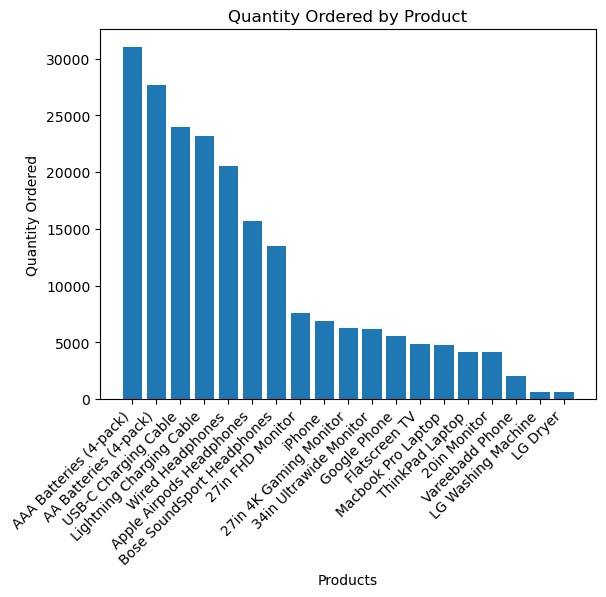

<Figure size 1500x1000 with 0 Axes>

In [24]:
products = most_sold_product_sorted.index
quantity_ordered = most_sold_product_sorted['Quantity Ordered']

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation=45,ha='right')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.title('Quantity Ordered by Product')
plt.figure(figsize=(15,10))
plt.show()

# Respuesta: El producto más vendido es AAA Batteries (4-pack) con 31017 unidades vendidas.